# STUDENT DETAILS 

    -   Student Name: Sunjida Islam Simi
    
    -   Student ID:30071076

# DATA IMPORTATION 



In [1]:
import pandas as pd
# Assuming the CSV file is in the same directory as your code file
file_path = "MS4S16_Dataset.csv"
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Pre-process the dataset and perform an Exploratory Data Analysis (EDA) of the data.

This should include:
• Splitting the dataset into a Training Set and a Test Set;
• Taking care of any missing, duplicated or outlier values;
• Transforming data, where appropriate to do so;
• Encoding categorical features;
• Performing feature engineering techniques such as feature extraction and selection;
• Producing appropriate and informative plots and tables for an exploratory analysis;
• Assessing statistical assumptions and inferences.



##  • Taking care of any missing, duplicated or outlier values;


In [2]:
df_cleaned = df.dropna()

In [3]:
from scipy.stats.mstats import winsorize

# Assuming 'df' is your DataFrame containing the dataset

# Select only the numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns

# Apply winsorization to each numerical column
for column in numerical_columns:
    df_cleaned[column] = winsorize(df_cleaned[column], limits=[0.05, 0.05])

# Now df contains winsorized values for all numerical columns, effectively handling outliers


C:\Users\ROBERT\AppData\Local\Temp\ipykernel_5604\2292577931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = winsorize(df_cleaned[column], limits=[0.05, 0.05])


In [4]:
df_cleaned.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Matplotlib is building the font cache; this may take a moment.


TypeError: Neither the `x` nor `y` variable appears to be numeric.

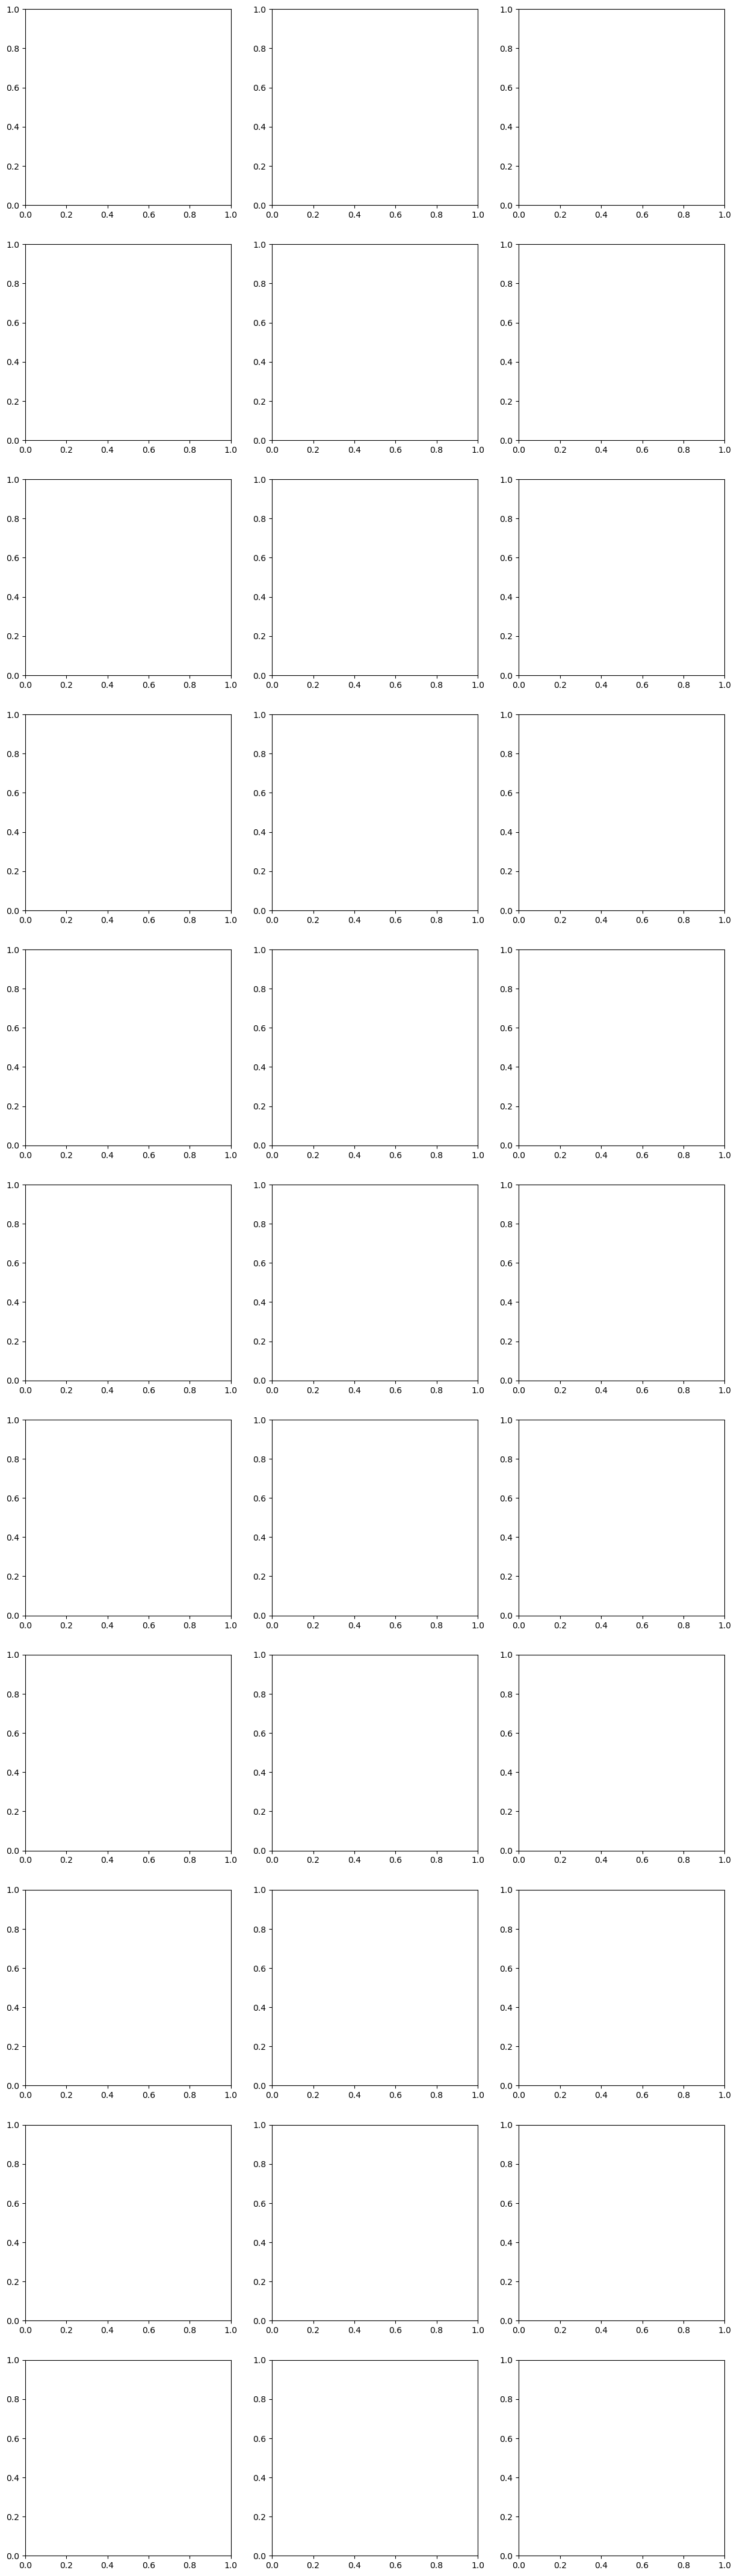

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'id' column from the list of columns
columns_to_plot = [col for col in df_cleaned.columns if col != 'id']

# Set up subplots
num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = [axes]

# Create bar plots for each column against 'diagnosis'
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    
    sns.barplot(x='diagnosis', y=column, data=df_cleaned, ax=axes[row][col])

    # Set plot title
    axes[row][col].set_title(f'{column} by Diagnosis')

# Adjust layout
plt.tight_layout()
plt.show()


# encoding 


In [ ]:
# Encode 'diagnosis' column
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].replace({'M': 1, 'B': 2})


C:\Users\neste\AppData\Local\Temp\ipykernel_21916\3512790164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['diagnosis'] = df_cleaned['diagnosis'].replace({'M': 1, 'B': 2})


In [ ]:
# Drop the 'id' column
df_cleaned.drop(columns='id', inplace=True)


C:\Users\neste\AppData\Local\Temp\ipykernel_21916\356541969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns='id', inplace=True)


In [ ]:
df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.20630,0.243900,0.127900,0.2350,...,25.38,17.33,177.00,2019.0,0.16220,0.56460,0.68330,0.23780,0.4055,0.11890
1,1,20.570,17.77,132.90,1311.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.23780,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.11970,0.20630,0.241400,0.105200,0.2350,...,14.91,26.50,98.87,567.7,0.17320,0.56460,0.68330,0.23780,0.4055,0.11980
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.54,16.85,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,20.580,22.39,135.90,1311.0,0.11100,0.11590,0.243900,0.127900,0.1726,...,25.45,26.40,166.10,2019.0,0.14100,0.21130,0.41070,0.22160,0.2121,0.07115
567,1,16.600,26.60,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
568,1,20.580,26.60,135.90,1265.0,0.11780,0.20630,0.243900,0.127900,0.2350,...,25.68,36.00,177.00,1821.0,0.16500,0.56460,0.68330,0.23780,0.4055,0.11980
569,2,9.667,24.54,61.05,280.5,0.07474,0.04362,0.004559,0.005495,0.1587,...,10.62,30.37,68.03,342.9,0.09836,0.07094,0.01674,0.02381,0.2871,0.07039


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = df_cleaned.drop(columns=[ 'diagnosis'])  # Exclude 'id' and 'diagnosis' columns
y = df_cleaned['diagnosis']

# Define the feature extraction and selection pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),          # Standardize features
    ('pca', PCA(n_components=10)),          # Perform PCA for dimensionality reduction
    ('feature_selection', SelectKBest(score_func=f_classif, k=5))  # Select top 5 features based on ANOVA F-value
])

# Fit pipeline to data and transform features
X_selected = pipeline.fit_transform(X, y)


# 2. Utilising features and attributes derived from the pre-processing and EDA stage, conduct an unsupervised machine learning analysis with the aim of gaining further insights into the data via either clustering or dimensionality reduction.


# • Clustering using different appropriate algorithms, e.g. K-means, hierarchical, DBScan;



C:\Users\neste\AppData\Local\Temp\ipykernel_21916\1889816541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = clusters


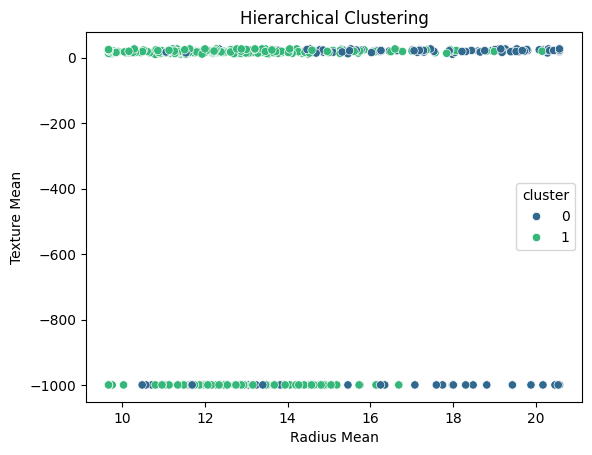

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame

# Select features for clustering (excluding 'id' and 'diagnosis' columns)
X = df_cleaned.drop(columns=[ 'diagnosis'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2)  # Assuming you want to find 2 clusters
clusters = clustering.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_cleaned['cluster'] = clusters

# Plot the clusters
sns.scatterplot(data=df_cleaned, x='radius_mean', y='texture_mean', hue='cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()



# • Performing a dimensionality reduction to see if this improves your clustering, or to see if a smaller number of features can adequately explain the observations;



C:\Users\neste\AppData\Local\Temp\ipykernel_21916\1180180824.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PCA1'] = X_pca[:, 0]
C:\Users\neste\AppData\Local\Temp\ipykernel_21916\1180180824.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PCA2'] = X_pca[:, 1]


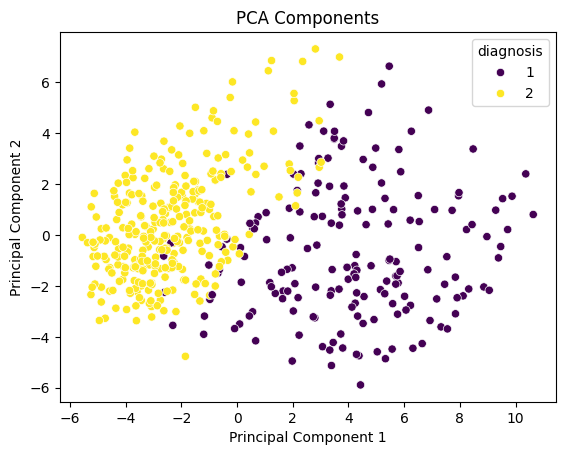

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame

# Select features for PCA (excluding 'id' and 'diagnosis' columns)
X = df_cleaned.drop(columns=[ 'diagnosis'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

# Plot the PCA components
sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='diagnosis', palette='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# • Evaluating the utility of the different algorithms with appropriate metrics.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df_cleaned' is your DataFrame

# Select features for clustering (excluding 'id' and 'diagnosis' columns)
X = df_cleaned.drop(columns=['diagnosis'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering before dimensionality reduction
clustering_before = AgglomerativeClustering(n_clusters=2)  # Assuming you want to find 2 clusters
clusters_before = clustering_before.fit_predict(X_scaled)

# Compute evaluation metrics before dimensionality reduction
silhouette_score_before = silhouette_score(X_scaled, clusters_before)
davies_bouldin_score_before = davies_bouldin_score(X_scaled, clusters_before)
calinski_harabasz_score_before = calinski_harabasz_score(X_scaled, clusters_before)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Perform hierarchical clustering after dimensionality reduction
clustering_after = AgglomerativeClustering(n_clusters=2)  # Assuming you want to find 2 clusters
clusters_after = clustering_after.fit_predict(X_pca)

# Compute evaluation metrics after dimensionality reduction
silhouette_score_after = silhouette_score(X_pca, clusters_after)
davies_bouldin_score_after = davies_bouldin_score(X_pca, clusters_after)
calinski_harabasz_score_after = calinski_harabasz_score(X_pca, clusters_after)

# Print evaluation metrics
print("Clustering Performance Before Dimensionality Reduction:")
print("Silhouette Score:", silhouette_score_before)
print("Davies-Bouldin Index:", davies_bouldin_score_before)
print("Calinski-Harabasz Index:", calinski_harabasz_score_before)
print("\nClustering Performance After Dimensionality Reduction:")
print("Silhouette Score:", silhouette_score_after)
print("Davies-Bouldin Index:", davies_bouldin_score_after)
print("Calinski-Harabasz Index:", calinski_harabasz_score_after)


Clustering Performance Before Dimensionality Reduction:
Silhouette Score: 0.3323295764458578
Davies-Bouldin Index: 1.330272828960137
Calinski-Harabasz Index: 251.67049412099806

Clustering Performance After Dimensionality Reduction:
Silhouette Score: 0.4937888390200214
Davies-Bouldin Index: 0.8376588296064786
Calinski-Harabasz Index: 537.0035760890471


# . Utilising features and attributes from your pre-processing, EDA and unsupervised work, conduct a supervised machine learning analysis aimed at either classifying cases of breast cancer as benign (diagnosis=B) or malignant (Diagnosis=M), or predicting one of the numerical features using regression techniques

# • Utilising different classification algorithms to correctly identify observations as benign (Diagnosis=B) or malignant (Diagnosis=M);

# • Creating some regression models to predict the numerical features;

# • Evaluating your supervised models with metrics of your choice

Train Accuracy: 1.0
Test Accuracy: 0.9072164948453608


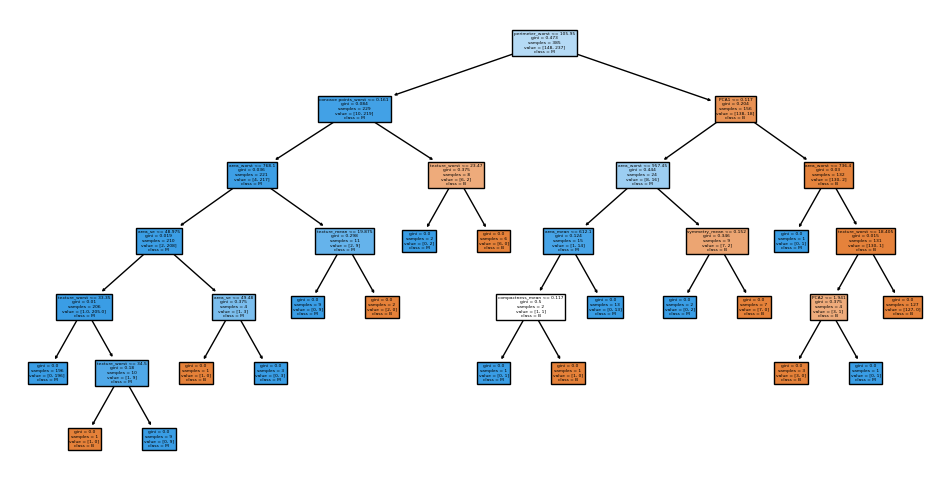

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame

# Select features (X) and target variable (y)
X = df_cleaned.drop(columns=['diagnosis'])  # Exclude 'id' column
y = df_cleaned['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['B', 'M'])
plt.show()




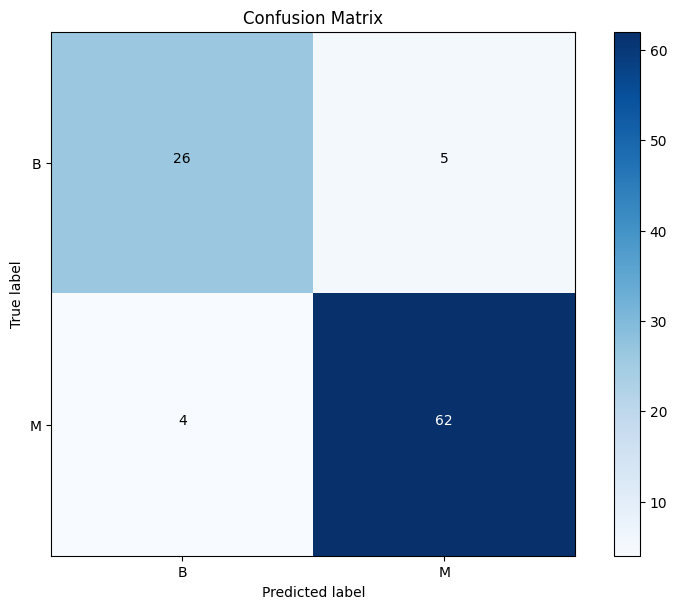

In [ ]:
import numpy as np  # Add this line to import numpy

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['B', 'M']))
plt.xticks(tick_marks, ['B', 'M'])
plt.yticks(tick_marks, ['B', 'M'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
